# Setup

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

2024-08-08 06:51:08.714606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# The Individual household electric power consumption dataset

## Download the dataset

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip',
    extract=True
)

print()
print(zip_path)


/Users/maelfosso/.keras/datasets/individual+household+electric+power+consumption.zip


In [3]:
!ls ~/.keras/datasets

household_power_consumption.txt
individual+household+electric+power+consumption.zip


In [4]:
dataset_path = os.path.join(os.path.dirname(zip_path), 'household_power_consumption.txt')
print(dataset_path)

/Users/maelfosso/.keras/datasets/household_power_consumption.txt


In [ ]:
!less /Users/maelfosso/.keras/datasets/household_power_consumption.txt

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000
16/12/2006;17:33:00;3.662;0.510;233.860;15.800;0.000;2.000;16.000
16/12/2006;17:34:00;4.448;0.498;232.860;19.600;0.000;1.000;17.000
16/12/2006;17:35:00;5.412;0.470;232.780;23.200;0.000;1.000;17.000
16/12/2006;17:36:00;5.224;0.478;232.990;22.400;0.000;1.000;16.000
16/12/2006;17:37:00;

In [ ]:
na_values=["?"]
df = pd.read_csv(dataset_path, sep=";", nav_)
df.head()

In [ ]:
df.shape

## Data Wrangling and preprocessing

### Missing values

In [ ]:
df.describe()

In [46]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [47]:
df.describe(include='all')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,1442,1440,6534,896,5168,377,153,145,NaN
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [52]:
n = df['Sub_metering_3'].count()
print(f'Count: {n}')
print(f'Missing values: {df.shape[0] - n} - {100 * (df.shape[0] - n)/df.shape[0]}%')

Count: 2049280
Missing values: 25979 - 1.2518437457686005%


<Axes: ylabel='Sub_metering_3'>

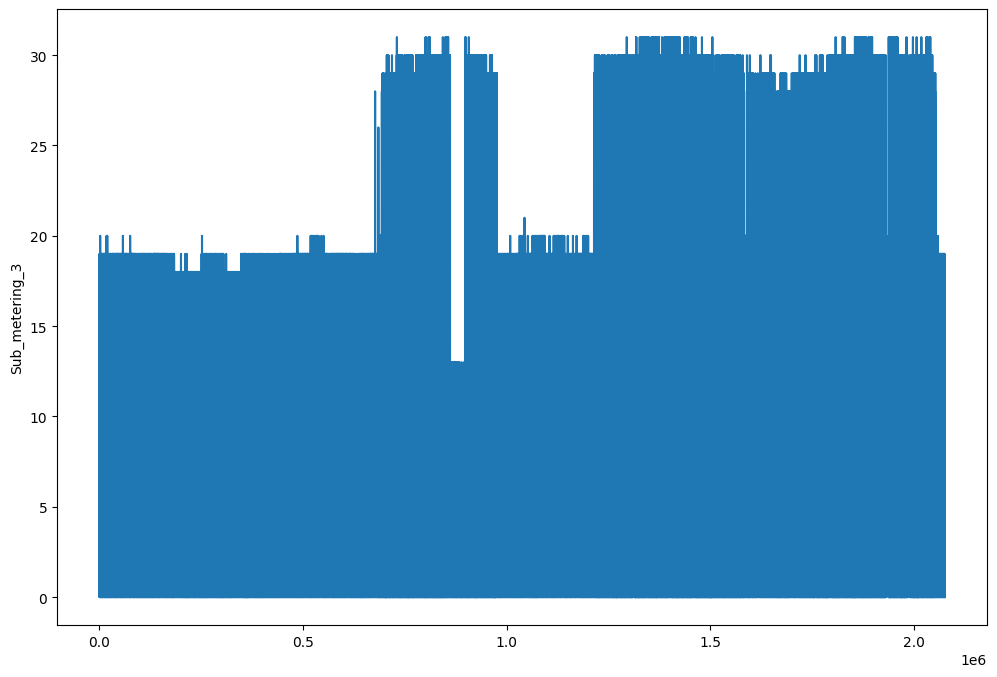

In [53]:
sns.lineplot(data=df['Sub_metering_3'])

In [54]:
df[df['Sub_metering_3'].isna()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [55]:
df.iloc[6839]

Date                     21/12/2006
Time                       11:23:00
Global_active_power               ?
Global_reactive_power             ?
Voltage                           ?
Global_intensity                  ?
Sub_metering_1                    ?
Sub_metering_2                    ?
Sub_metering_3                  NaN
Name: 6839, dtype: object